In [2]:
#1: to connect to drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#2: to have shorter path
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [4]:
#!ls /mydrive/colab/NordTank/darknet/data/ds_files/
%cd /mydrive/co1/newData

/content/gdrive/My Drive/co1/newData


In [5]:
%pwd

'/content/gdrive/My Drive/co1/newData'

In [6]:
import pandas as pd
from sklearn import preprocessing

# read by default 1st sheet of an excel file
df = pd.read_excel('2941_2_lable.xlsx')
df=df.drop(["car_id", "timestamp", "alt", "satellites", "overspeedingtotaldistance", "bearing", "signalstrength", "totalidlingtime", "lat", "lng", "alarm", "hdop", "totalodometer", "obd_totalodometer", "switchlockendtime", "batterypercentage", "externalvoltage", "ERROR"] ,axis=1)
df=df.dropna()
df.head()

#print(df)

min_max_Scalar = preprocessing.MinMaxScaler()

col = df.columns
result = min_max_Scalar.fit_transform(df)
min_max_Scalar_df = pd.DataFrame(result, columns=col)
df = min_max_Scalar_df
print(df)

        obd_upstreamo2sensorvoltage  speed  obd_sparkadvance  \
0                               0.0    0.0               0.0   
1                               0.0    0.0               0.0   
2                               0.0    0.0               0.0   
3                               0.0    0.0               0.0   
4                               0.0    0.0               0.0   
...                             ...    ...               ...   
165072                          0.0    0.0               0.0   
165073                          0.0    0.0               0.0   
165074                          0.0    0.0               0.0   
165075                          0.0    0.0               0.0   
165076                          0.0    0.0               0.0   

        obd_airconditioningstatus  obd_intakeairtemperature  \
0                             0.0                       0.0   
1                             0.0                       0.0   
2                             0.0         

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(28, 28))
sns.heatmap(df.corr(), annot=True)

In [7]:
y=df["obd_fuelinjectiontiming"]
X=df.drop(["obd_fuelinjectiontiming"],axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (110601, 19) (110601,)
Test (54476, 19) (54476,)


In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






r2=  0.8945727967548145
mae = 0.034951835878410754
[0.8394762223717471, 0.852649532730034, 0.8439534403104514, 0.8827534136196435, 0.8934983840262223, 0.8854917622244687, 0.8662612136923702, 0.8623386204674739, 0.8643037370521136, 0.8706511120422664, 0.8776761725509868, 0.8944156353909644, 0.9065031360379857, 0.9078759489757211, 0.9004707854024641, 0.8986365884971614, 0.893798911045288, 0.8936855408138715, 0.8945727967548145]
[Index(['obd_intakemanifoldabsolutepressure'], dtype='object'), Index(['obd_intakemanifoldabsolutepressure', 'obd_tpssensorvoltage'], dtype='object'), Index(['obd_intakemanifoldabsolutepressure', 'obd_tpssensorvoltage',
       'obd_throttleposition'],
      dtype='object'), Index(['obd_intakemanifoldabsolutepressure', 'obd_stepmotorposition',
       'obd_tpssensorvoltage', 'obd_throttleposition'],
      dtype='object'), Index(['obd_intakemanifoldabsolutepressure', 'obd_calculatedengineload',
       'obd_stepmotorposition', 'obd_tpssensorvoltage',
       'obd_throt

In [11]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


0
Index(['obd_intakemanifoldabsolutepressure'], dtype='object')
1
['obd_tpssensorvoltage']
2
['obd_throttleposition']
3
['obd_stepmotorposition']
4
['obd_calculatedengineload']
5
['obd_enginerpm']
6
['obd_batteryvoltage']
7
['obd_enginecoolanttemperature']
8
['speed']
9
['obd_sparkadvance']
10
['obd_coilchargingtime']
11
['ignition']
12
['movement']
13
['obd_intakeairtemperature']
14
['obd_canistervalve']
15
['obd_downstreamo2sensorvoltage']
16
['obd_upstreamo2sensorvoltage']
17
['obd_airconditioningstatus']
18
['engineontime']
[['obd_intakemanifoldabsolutepressure'], ['obd_tpssensorvoltage'], ['obd_throttleposition'], ['obd_stepmotorposition'], ['obd_calculatedengineload'], ['obd_enginerpm'], ['obd_batteryvoltage'], ['obd_enginecoolanttemperature'], ['speed'], ['obd_sparkadvance'], ['obd_coilchargingtime'], ['ignition'], ['movement'], ['obd_intakeairtemperature'], ['obd_canistervalve'], ['obd_downstreamo2sensorvoltage'], ['obd_upstreamo2sensorvoltage'], ['obd_airconditioningstatus'], 

In [12]:
import numpy as geek

in_arr1 = geek.array(y_test)
in_arr2 = geek.array(yhat)

print ("1st Input array : ", in_arr1)
print ("2nd Input array : ", in_arr2)


out_arr = geek.subtract(in_arr1, in_arr2)
print ("Output array: ", out_arr)

1st Input array :  [0.54545455 0.18181818 0.04545455 ... 0.13636364 0.13636364 0.09090909]
2nd Input array :  [0.5447672  0.20107674 0.07060436 ... 0.07073949 0.15295664 0.09270788]
Output array:  [ 0.00068734 -0.01925856 -0.02514981 ...  0.06562415 -0.01659301
 -0.00179879]


In [13]:
import numpy as np

#find maximum value
max_value = np.max(out_arr)
min_value = np.min(out_arr)

print('minimum value in array\n',min_value)
print('Maximum value in array\n',max_value)

minimum value in array
 -0.2319689368738708
Maximum value in array
 0.13328340962561486


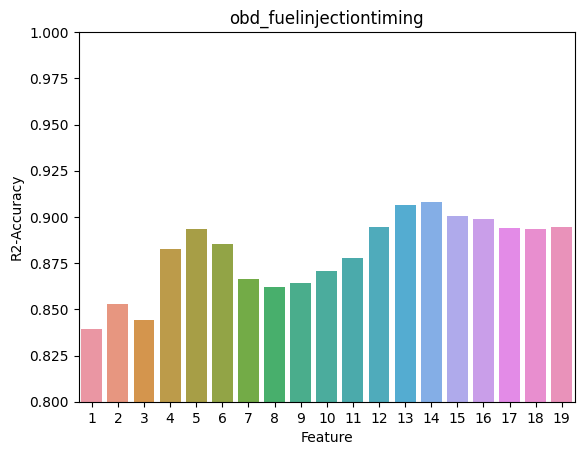

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_fuelinjectiontiming')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.8, 1)

# Show the plot
plt.show()

<Axes: title={'center': 'obd_fuelinjectiontiming'}>

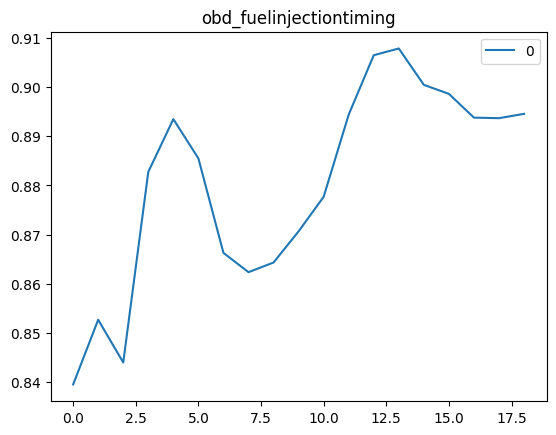

In [15]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

#ax.set_ylabel('obd_fuelinjectiontiming')
#ax.set_xlabel('k')

df2.plot.line(title = 'obd_fuelinjectiontiming')

In [16]:
new_features

Index(['obd_upstreamo2sensorvoltage', 'speed', 'obd_sparkadvance',
       'obd_airconditioningstatus', 'obd_intakeairtemperature',
       'obd_intakemanifoldabsolutepressure', 'obd_calculatedengineload',
       'movement', 'ignition', 'obd_coilchargingtime', 'obd_stepmotorposition',
       'obd_enginerpm', 'obd_batteryvoltage', 'obd_downstreamo2sensorvoltage',
       'obd_tpssensorvoltage', 'obd_canistervalve', 'engineontime',
       'obd_throttleposition', 'obd_enginecoolanttemperature'],
      dtype='object')

In [17]:
yhat.shape, y_test.shape

((54476,), (54476,))

In [18]:
#merge the two dataframes
df1 = pd.DataFrame(y_test)
print (y_test)
df2 = pd.DataFrame(yhat)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['y_test', 'yhat']
df3.head(100)


144285    0.545455
104779    0.181818
24896     0.045455
144484    0.000000
34774     0.045455
            ...   
148796    0.000000
78395     0.227273
36958     0.136364
146833    0.136364
121474    0.090909
Name: obd_fuelinjectiontiming, Length: 54476, dtype: float64


,y_test,yhat
144285,0.545455,NaN
104779,0.181818,NaN
24896,0.045455,0.088093
144484,0.000000,NaN
34774,0.045455,0.100049
...,...,...
152733,0.000000,NaN
45450,0.000000,0.078259
14017,0.500000,0.112385
115057,0.045455,NaN


In [19]:
dfs = pd.DataFrame(X_test_fs)

In [20]:
y_test=df1.values

In [21]:
r2 = model.score(X_test_fs, yhat)

In [22]:
y=df["obd_throttleposition"]
X=df.drop(["obd_throttleposition"],axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (110601, 19) (110601,)
Test (54476, 19) (54476,)


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






r2=  0.7072795745268068
mae = 0.044551924449029785
[0.25927681369154676, 0.32763156631427093, 0.5236357584818608, 0.4505175606484907, 0.5882550560423184, 0.6458431739081634, 0.5253640010594889, 0.6381141986695575, 0.6080131709767332, 0.6151427330066838, 0.6075595721735627, 0.6004241387727828, 0.5912883012566024, 0.5955393575505317, 0.6300140518281917, 0.6378951933905238, 0.6563790778891231, 0.7215790913298271, 0.7072795745268068]
[Index(['obd_tpssensorvoltage'], dtype='object'), Index(['obd_tpssensorvoltage', 'obd_fuelinjectiontiming'], dtype='object'), Index(['obd_intakemanifoldabsolutepressure', 'obd_tpssensorvoltage',
       'obd_fuelinjectiontiming'],
      dtype='object'), Index(['obd_intakemanifoldabsolutepressure', 'obd_stepmotorposition',
       'obd_tpssensorvoltage', 'obd_fuelinjectiontiming'],
      dtype='object'), Index(['obd_intakemanifoldabsolutepressure', 'obd_stepmotorposition',
       'obd_enginerpm', 'obd_tpssensorvoltage', 'obd_fuelinjectiontiming'],
      dtype='ob

In [25]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


0
Index(['obd_tpssensorvoltage'], dtype='object')
1
['obd_fuelinjectiontiming']
2
['obd_intakemanifoldabsolutepressure']
3
['obd_stepmotorposition']
4
['obd_enginerpm']
5
['speed']
6
['obd_calculatedengineload']
7
['obd_sparkadvance']
8
['obd_batteryvoltage']
9
['obd_enginecoolanttemperature']
10
['ignition']
11
['movement']
12
['obd_coilchargingtime']
13
['obd_intakeairtemperature']
14
['obd_canistervalve']
15
['obd_downstreamo2sensorvoltage']
16
['obd_upstreamo2sensorvoltage']
17
['engineontime']
18
['obd_airconditioningstatus']
[['obd_tpssensorvoltage'], ['obd_fuelinjectiontiming'], ['obd_intakemanifoldabsolutepressure'], ['obd_stepmotorposition'], ['obd_enginerpm'], ['speed'], ['obd_calculatedengineload'], ['obd_sparkadvance'], ['obd_batteryvoltage'], ['obd_enginecoolanttemperature'], ['ignition'], ['movement'], ['obd_coilchargingtime'], ['obd_intakeairtemperature'], ['obd_canistervalve'], ['obd_downstreamo2sensorvoltage'], ['obd_upstreamo2sensorvoltage'], ['engineontime'], ['obd_a

In [26]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


0
Index(['obd_tpssensorvoltage'], dtype='object')
1
['obd_fuelinjectiontiming']
2
['obd_intakemanifoldabsolutepressure']
3
['obd_stepmotorposition']
4
['obd_enginerpm']
5
['speed']
6
['obd_calculatedengineload']
7
['obd_sparkadvance']
8
['obd_batteryvoltage']
9
['obd_enginecoolanttemperature']
10
['ignition']
11
['movement']
12
['obd_coilchargingtime']
13
['obd_intakeairtemperature']
14
['obd_canistervalve']
15
['obd_downstreamo2sensorvoltage']
16
['obd_upstreamo2sensorvoltage']
17
['engineontime']
18
['obd_airconditioningstatus']
[['obd_tpssensorvoltage'], ['obd_fuelinjectiontiming'], ['obd_intakemanifoldabsolutepressure'], ['obd_stepmotorposition'], ['obd_enginerpm'], ['speed'], ['obd_calculatedengineload'], ['obd_sparkadvance'], ['obd_batteryvoltage'], ['obd_enginecoolanttemperature'], ['ignition'], ['movement'], ['obd_coilchargingtime'], ['obd_intakeairtemperature'], ['obd_canistervalve'], ['obd_downstreamo2sensorvoltage'], ['obd_upstreamo2sensorvoltage'], ['engineontime'], ['obd_a

<Axes: title={'center': 'obd_throttleposition'}>

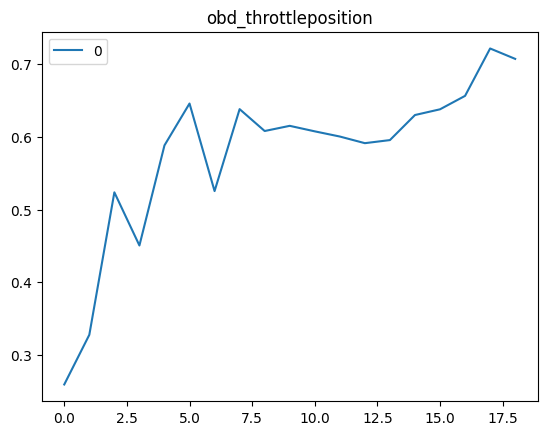

In [27]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_throttleposition')

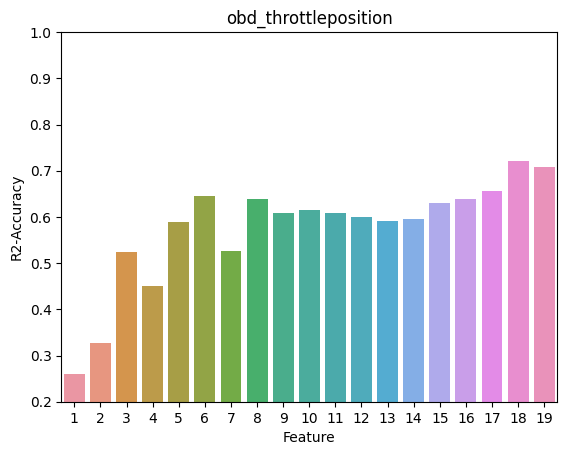

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_throttleposition')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.2, 1)

# Show the plot
plt.show()

In [29]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(l)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

,k,mae
0,1,0.078187
1,2,0.076743
2,3,0.059991
3,4,0.065720
4,5,0.054575
5,6,0.050604
6,7,0.061039
7,8,0.051758
8,9,0.053595
9,10,0.052908


In [30]:
new_features

Index(['obd_upstreamo2sensorvoltage', 'speed', 'obd_sparkadvance',
       'obd_airconditioningstatus', 'obd_intakeairtemperature',
       'obd_intakemanifoldabsolutepressure', 'obd_calculatedengineload',
       'movement', 'ignition', 'obd_coilchargingtime', 'obd_stepmotorposition',
       'obd_enginerpm', 'obd_batteryvoltage', 'obd_downstreamo2sensorvoltage',
       'obd_tpssensorvoltage', 'obd_fuelinjectiontiming', 'obd_canistervalve',
       'engineontime', 'obd_enginecoolanttemperature'],
      dtype='object')

In [31]:
y=df["obd_enginecoolanttemperature"]
X=df.drop(["obd_enginecoolanttemperature"],axis=1)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (110601, 19) (110601,)
Test (54476, 19) (54476,)


In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






r2=  0.9613372546839165
mae = 0.0517535963689491
[0.894083447874393, 0.9172118030354135, 0.917429537893444, 0.9204840753665454, 0.9322501274288872, 0.937236684133608, 0.9396620132112515, 0.9394963632982969, 0.9400926314826659, 0.9414380489907539, 0.9464084587207892, 0.9499064369660226, 0.9517278631203746, 0.9526090815023167, 0.9580301847320816, 0.9588644224672538, 0.9586991433856228, 0.9612153314935473, 0.9613372546839165]
[Index(['obd_batteryvoltage'], dtype='object'), Index(['obd_intakeairtemperature', 'obd_batteryvoltage'], dtype='object'), Index(['obd_intakeairtemperature', 'obd_coilchargingtime',
       'obd_batteryvoltage'],
      dtype='object'), Index(['obd_intakeairtemperature', 'obd_coilchargingtime', 'obd_enginerpm',
       'obd_batteryvoltage'],
      dtype='object'), Index(['obd_intakeairtemperature', 'obd_coilchargingtime',
       'obd_stepmotorposition', 'obd_enginerpm', 'obd_batteryvoltage'],
      dtype='object'), Index(['obd_intakeairtemperature', 'obd_intakemanifolda

In [34]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


0
Index(['obd_batteryvoltage'], dtype='object')
1
['obd_intakeairtemperature']
2
['obd_coilchargingtime']
3
['obd_enginerpm']
4
['obd_stepmotorposition']
5
['obd_intakemanifoldabsolutepressure']
6
['ignition']
7
['movement']
8
['obd_sparkadvance']
9
['obd_calculatedengineload']
10
['obd_tpssensorvoltage']
11
['obd_canistervalve']
12
['obd_fuelinjectiontiming']
13
['speed']
14
['obd_downstreamo2sensorvoltage']
15
['obd_upstreamo2sensorvoltage']
16
['obd_throttleposition']
17
['engineontime']
18
['obd_airconditioningstatus']
[['obd_batteryvoltage'], ['obd_intakeairtemperature'], ['obd_coilchargingtime'], ['obd_enginerpm'], ['obd_stepmotorposition'], ['obd_intakemanifoldabsolutepressure'], ['ignition'], ['movement'], ['obd_sparkadvance'], ['obd_calculatedengineload'], ['obd_tpssensorvoltage'], ['obd_canistervalve'], ['obd_fuelinjectiontiming'], ['speed'], ['obd_downstreamo2sensorvoltage'], ['obd_upstreamo2sensorvoltage'], ['obd_throttleposition'], ['engineontime'], ['obd_airconditioningst

<Axes: title={'center': 'obd_enginecoolanttemperature'}>

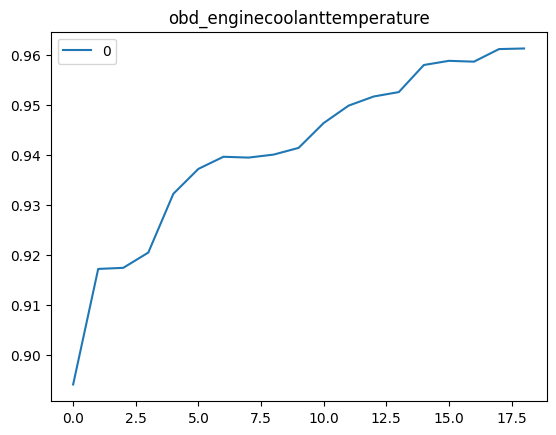

In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_enginecoolanttemperature')

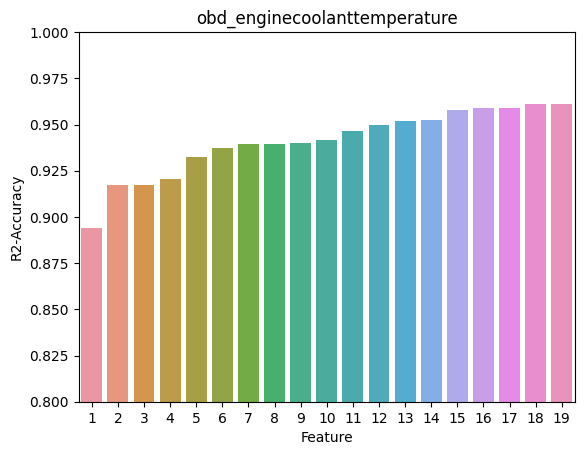

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_enginecoolanttemperature')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.8, 1)

# Show the plot
plt.show()

In [ ]:
new_features

Index(['obd_upstreamo2sensorvoltage', 'speed', 'obd_sparkadvance',
       'obd_airconditioningstatus', 'obd_intakeairtemperature',
       'obd_intakemanifoldabsolutepressure', 'obd_calculatedengineload',
       'movement', 'ignition', 'obd_coilchargingtime', 'obd_stepmotorposition',
       'obd_enginerpm', 'obd_batteryvoltage', 'obd_downstreamo2sensorvoltage',
       'obd_tpssensorvoltage', 'obd_fuelinjectiontiming', 'obd_canistervalve',
       'engineontime', 'obd_throttleposition'],
      dtype='object')

In [ ]:
y=df["obd_intakemanifoldabsolutepressure"]
X=df.drop(["obd_intakemanifoldabsolutepressure"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (110601, 19) (110601,)
Test (54476, 19) (54476,)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






r2=  0.9669712213388084
mae = 0.03927140313330461
[0.9474668910932766, 0.9479652070433964, 0.9486547705362328, 0.9530939193296414, 0.9559578619531838, 0.957076330685703, 0.9604283933920974, 0.9631249070483363, 0.9634223585880838, 0.9631890194533003, 0.9670237285282579, 0.9644300182494742, 0.9651715823918943, 0.9665737030931217, 0.9642216067680242, 0.9611026830894613, 0.9622115271031103, 0.9611247912168696, 0.9669712213388084]
[Index(['obd_fuelinjectiontiming'], dtype='object'), Index(['obd_tpssensorvoltage', 'obd_fuelinjectiontiming'], dtype='object'), Index(['obd_tpssensorvoltage', 'obd_fuelinjectiontiming',
       'obd_throttleposition'],
      dtype='object'), Index(['obd_stepmotorposition', 'obd_tpssensorvoltage',
       'obd_fuelinjectiontiming', 'obd_throttleposition'],
      dtype='object'), Index(['obd_calculatedengineload', 'obd_stepmotorposition',
       'obd_tpssensorvoltage', 'obd_fuelinjectiontiming',
       'obd_throttleposition'],
      dtype='object'), Index(['obd_calcu

In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


0
Index(['obd_fuelinjectiontiming'], dtype='object')
1
['obd_tpssensorvoltage']
2
['obd_throttleposition']
3
['obd_stepmotorposition']
4
['obd_calculatedengineload']
5
['obd_batteryvoltage']
6
['obd_enginerpm']
7
['obd_enginecoolanttemperature']
8
['obd_coilchargingtime']
9
['obd_intakeairtemperature']
10
['obd_sparkadvance']
11
['ignition']
12
['movement']
13
['speed']
14
['obd_canistervalve']
15
['obd_downstreamo2sensorvoltage']
16
['obd_upstreamo2sensorvoltage']
17
['obd_airconditioningstatus']
18
['engineontime']
[['obd_fuelinjectiontiming'], ['obd_tpssensorvoltage'], ['obd_throttleposition'], ['obd_stepmotorposition'], ['obd_calculatedengineload'], ['obd_batteryvoltage'], ['obd_enginerpm'], ['obd_enginecoolanttemperature'], ['obd_coilchargingtime'], ['obd_intakeairtemperature'], ['obd_sparkadvance'], ['ignition'], ['movement'], ['speed'], ['obd_canistervalve'], ['obd_downstreamo2sensorvoltage'], ['obd_upstreamo2sensorvoltage'], ['obd_airconditioningstatus'], ['engineontime']]
[0.9

<Axes: title={'center': 'obd_intakemanifoldabsolutepressure'}>

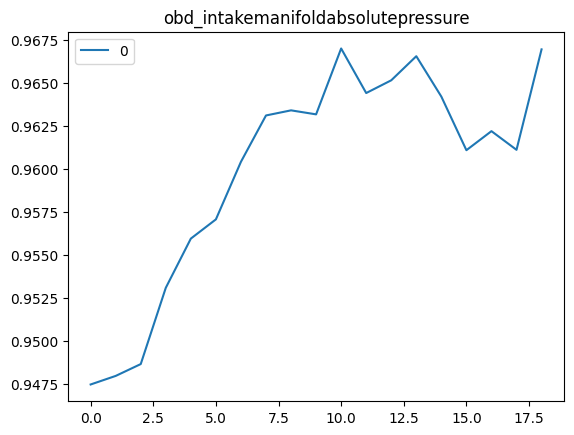

In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_intakemanifoldabsolutepressure')

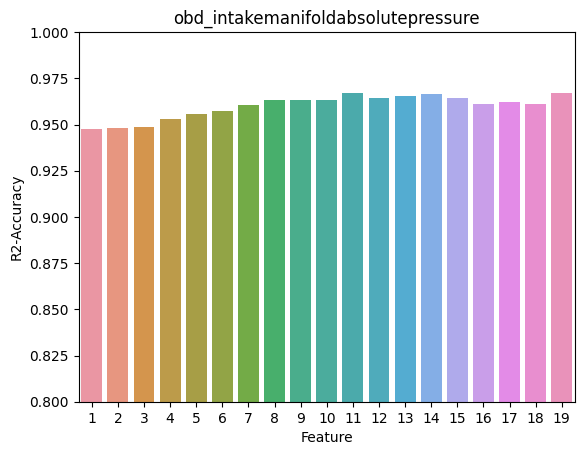

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_intakemanifoldabsolutepressure')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.8, 1)

# Show the plot
plt.show()

In [ ]:
y=df["obd_calculatedengineload"]
X=df.drop(["obd_calculatedengineload"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (110601, 19) (110601,)
Test (54476, 19) (54476,)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_calculatedengineload')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_calculatedengineload')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.4, 1)

# Show the plot
plt.show()

In [ ]:
y=df["obd_intakeairtemperature"]
X=df.drop(["obd_intakeairtemperature"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_intakeairtemperature')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_intakeairtemperature')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.5, 1)

# Show the plot
plt.show()

In [ ]:
y=df["obd_enginerpm"]
X=df.drop(["obd_enginerpm"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_enginerpm')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_enginerpm')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.7, 1)

# Show the plot
plt.show()

In [ ]:
y=df["obd_canistervalve"]
X=df.drop(["obd_canistervalve"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_canistervalve')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_canistervalve')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0, 1)

# Show the plot
plt.show()

In [ ]:
y=df["obd_airconditioningstatus"]
X=df.drop(["obd_airconditioningstatus"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_airconditioningstatus')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_airconditioningstatus')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.1, 1)

# Show the plot
plt.show()

In [ ]:
y=df["obd_downstreamo2sensorvoltage"]
X=df.drop(["obd_downstreamo2sensorvoltage"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_downstreamo2sensorvoltage')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_downstreamo2sensorvoltage')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0, 1)

# Show the plot
plt.show()

In [ ]:
y=df["obd_upstreamo2sensorvoltage"]
X=df.drop(["obd_upstreamo2sensorvoltage"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_upstreamo2sensorvoltage')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_upstreamo2sensorvoltage')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0, 0.8)

# Show the plot
plt.show()

In [ ]:
y=df["obd_coilchargingtime"]
X=df.drop(["obd_coilchargingtime"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_coilchargingtime')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_coilchargingtime')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.5, 1)

# Show the plot
plt.show()

In [ ]:
y=df["obd_sparkadvance"]
X=df.drop(["obd_sparkadvance"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_sparkadvance')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_sparkadvance')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.5, 1)

# Show the plot
plt.show()

In [ ]:
y=df["obd_stepmotorposition"]
X=df.drop(["obd_stepmotorposition"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_stepmotorposition')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_stepmotorposition')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.5, 1)

# Show the plot
plt.show()

In [ ]:
y=df["obd_tpssensorvoltage"]
X=df.drop(["obd_tpssensorvoltage"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_tpssensorvoltage')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_tpssensorvoltage')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.8, 1)

# Show the plot
plt.show()

In [ ]:
y=df["obd_batteryvoltage"]
X=df.drop(["obd_batteryvoltage"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_batteryvoltage')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_batteryvoltage')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.8, 1)

# Show the plot
plt.show()

In [ ]:
y=df["speed"]
X=df.drop(["speed"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'speed')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('speed')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0, 1)

# Show the plot
plt.show()

In [ ]:
y=df["ignition"]
X=df.drop(["ignition"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line()
plt.ylabel("ignition", size = 10)
plt.xlabel("k value in feature selection", size = 10)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('ignition')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.8, 1)

# Show the plot
plt.show()

In [ ]:
y=df["obd_sparkadvance"]
X=df.drop(["obd_sparkadvance"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'obd_sparkadvance')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('obd_sparkadvance')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.5, 0.9)

# Show the plot
plt.show()

In [ ]:
y=df["movement"]
X=df.drop(["movement"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

l = []
h = []
u = []
m = []
x = 1
while (x < 20):
    # feature selection
    def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectKBest(score_func=f_regression, k = x)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     mask = fs.get_support()
     new_features = X_train.columns[mask]
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs, new_features
    X_train_fs, X_test_fs, fs, new_features = select_features(X_train, y_train, X_test)
    # fit the model
    model = SVR()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    #print(mae)
    #a[x] = mae
    #print(x,mae)
    l = l + [mae]
    h = h + [x]
    u = u + [r2]
    m = m + [new_features]
    x=x+1
else:
    print("r2= ", r2)
    print("mae =", mae)
    print(u)
    print(m)






In [ ]:
i = 1
n = [None] * len(m)
n[0] = list(set(m[0]))
print(0)
print(m[0])
#print(m[1])
#print(list(set(m[1]) - set(m[0])))

while (i < 19):
  print(i)
  n[i] = dif = list(set(m[i])- set(m[i-1]))
  #print (m[i])
  #print (n[i-1])
  print(dif)
  #print("n[i-1] + dif")
  #print(n[i-1] + dif)
  #n[i] = n[i-1] + dif



  i = i+1

print(n)
print(u)


In [ ]:
df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']
df3.head(100)

df2.plot.line(title = 'movement')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.DataFrame(h)
df2 = pd.DataFrame(u)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['k', 'mae']

# Create a bar plot
sns.barplot(x=h, y=u)

# Set labels and limits
plt.title('movement')
plt.xlabel('Feature')
plt.ylabel('R2-Accuracy')
plt.ylim(0.5, 1)

# Show the plot
plt.show()